### Objective
Build Decision Tree models and analyze how different hyperparameters
such as depth, split criteria, and minimum samples affect model
performance and accuracy.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [ ]:
id3_model = DecisionTreeClassifier(criterion="entropy", random_state=40)

id3_model.fit(X_train, y_train)

y_pred_id3 = id3_model.predict(X_test)

acc_id3 = accuracy_score(y_test, y_pred_id3)
print("ID3 (Entropy) Accuracy:", acc_id3)


ID3 (Entropy) Accuracy: 1.0


In [ ]:
c45_model = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=2, random_state=40)

c45_model.fit(X_train, y_train)

y_pred_c45 = c45_model.predict(X_test)

acc_c45 = accuracy_score(y_test, y_pred_c45)
print("C4.5 (Entropy + Pruning) Accuracy:", acc_c45)


C4.5 (Entropy + Pruning) Accuracy: 0.9777777777777777


In [ ]:
for depth in [2, 3, None]:
    model = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=40)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Max Depth={depth}, Accuracy={acc:.3f}")


Max Depth=2, Accuracy=0.933
Max Depth=3, Accuracy=1.000
Max Depth=None, Accuracy=1.000


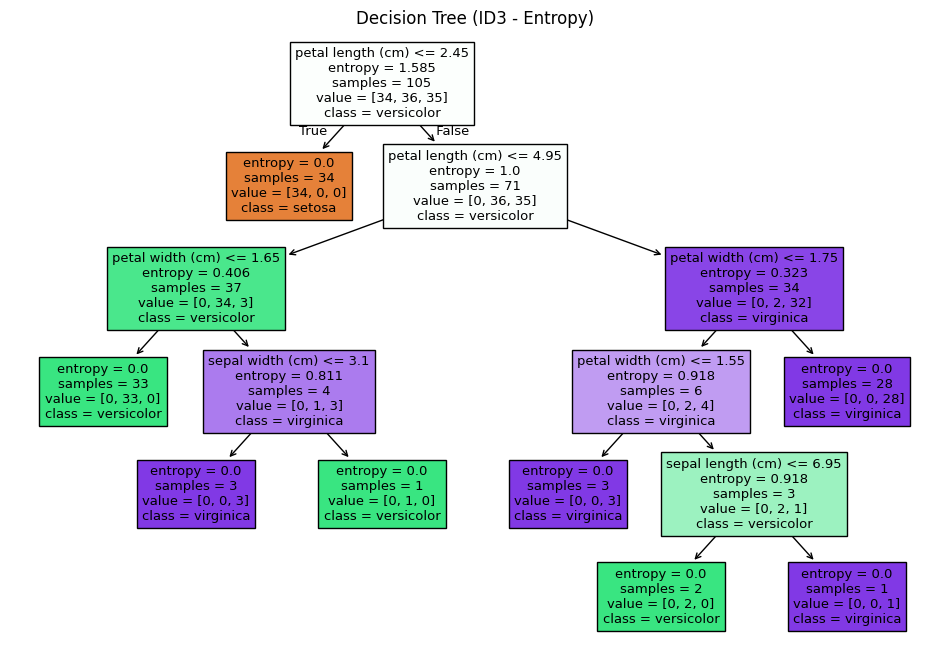

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(id3_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (ID3 - Entropy)")
plt.show()


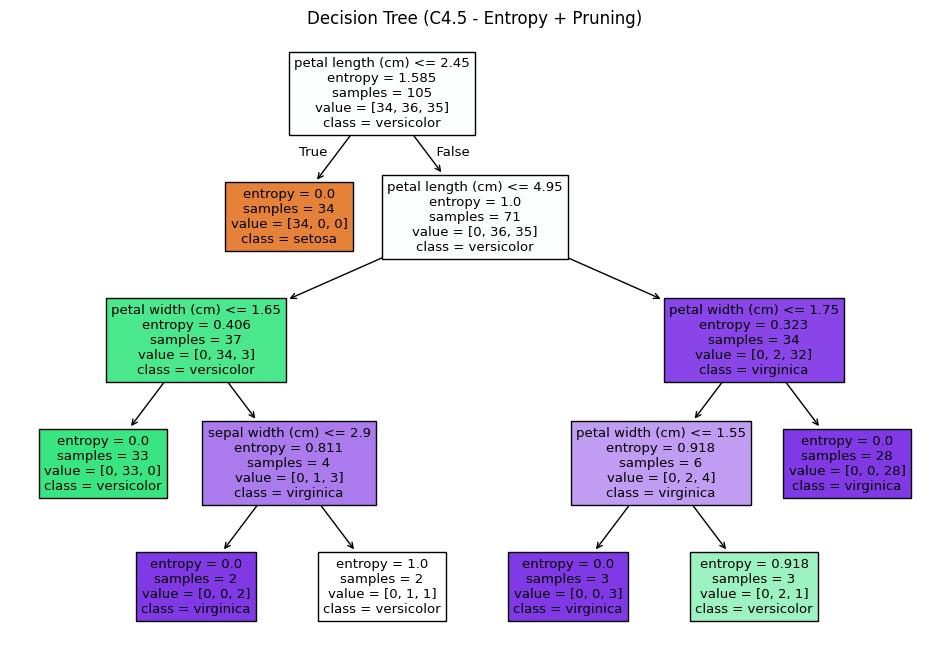

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(c45_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (C4.5 - Entropy + Pruning)")
plt.show()



## Observations

- Increasing tree depth improves training accuracy but can cause overfitting.
- Smaller values of min_samples_leaf help generalization.
- Entropy and Gini criteria produce slightly different splits.
- Decision trees are easy to interpret but sensitive to noise.
